In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alirezanejati36","key":"f1c8eb9a099e2d4f2c2eace3588270ac"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

 83% 77.0M/93.0M [00:00<00:00, 162MB/s]
100% 93.0M/93.0M [00:00<00:00, 149MB/s]


In [5]:
!ls

apartment-rental-offers-in-germany.zip	kaggle.json  sample_data


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
import zipfile
zip_ref = zipfile.ZipFile('apartment-rental-offers-in-germany.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()
df = pd.read_csv('/content/files/immo_data.csv')

In [8]:

pd.set_option('display.max_columns', None)
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

# Task 1

## Find the null data

In [10]:
df.isna().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

In [11]:
df.isna().sum()/len(df)

regio1                      0.000000
serviceCharge               0.025698
heatingType                 0.166844
telekomTvOffer              0.121328
telekomHybridUploadSpeed    0.832546
newlyConst                  0.000000
balcony                     0.000000
picturecount                0.000000
pricetrend                  0.006814
telekomUploadSpeed          0.124077
totalRent                   0.150705
yearConstructed             0.212182
scoutId                     0.000000
noParkSpaces                0.653889
firingTypes                 0.211880
hasKitchen                  0.000000
geo_bln                     0.000000
cellar                      0.000000
yearConstructedRange        0.212182
baseRent                    0.000000
houseNumber                 0.264155
livingSpace                 0.000000
geo_krs                     0.000000
condition                   0.254748
interiorQual                0.419063
petsAllowed                 0.426160
street                      0.000000
s


### Delete columns with more than 50% null data

In [12]:
null_columns = df.columns[((df.isna().sum()/len(df)) > 0.50)]
null_columns

Index(['telekomHybridUploadSpeed', 'noParkSpaces', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [13]:
df = df.drop(columns = null_columns)
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',
       'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace',
       'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'street',
       'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz',
       'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange',
       'garden', 'livingSpaceRange', 'regio2', 'regio3', 'description',
       'facilities', 'date'],
      dtype='object')


### Delete columns without useful information

In [14]:
df = df.drop(columns=['facilities','description','livingSpaceRange','scoutId','street',
                      'streetPlain','houseNumber','date','geo_bln','geo_krs','geo_plz',
                      'picturecount','telekomTvOffer'])

In [15]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                268850 non-null  object 
 1   serviceCharge         261941 non-null  float64
 2   heatingType           223994 non-null  object 
 3   newlyConst            268850 non-null  bool   
 4   balcony               268850 non-null  bool   
 5   pricetrend            267018 non-null  float64
 6   telekomUploadSpeed    235492 non-null  float64
 7   totalRent             228333 non-null  float64
 8   yearConstructed       211805 non-null  float64
 9   firingTypes           211886 non-null  object 
 10  hasKitchen            268850 non-null  bool   
 11  cellar                268850 non-null  bool   
 12  yearConstructedRange  211805 non-null  float64
 13  baseRent              268850 non-null  float64
 14  livingSpace           268850 non-null  float64
 15  

### Fillna numeric data by mean

In [16]:
import time
org_df = df.copy()
org_df_2 = df.copy()

start = time.time()
df.fillna(df._get_numeric_data().mean(), inplace = True)
print('run time : ' , (time.time() - start)) 

run time :  0.044507741928100586


In [17]:
df.isna().sum()

regio1                       0
serviceCharge                0
heatingType              44856
newlyConst                   0
balcony                      0
pricetrend                   0
telekomUploadSpeed           0
totalRent                    0
yearConstructed              0
firingTypes              56964
hasKitchen                   0
cellar                       0
yearConstructedRange         0
baseRent                     0
livingSpace                  0
condition                68489
interiorQual            112665
petsAllowed             114573
lift                         0
baseRentRange                0
typeOfFlat               36614
noRooms                      0
thermalChar                  0
floor                        0
numberOfFloors               0
noRoomsRange                 0
garden                       0
regio2                       0
regio3                       0
dtype: int64

### Fillna categorical data

In [18]:
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'bool':
      mode = df[col].value_counts().head(1).index[0]
      print('Null data in \"{}\" column fill with \n\"{}\"\n'.format(col , mode))
      df[col].fillna(mode, inplace = True)

Null data in "regio1" column fill with 
"Nordrhein_Westfalen"

Null data in "heatingType" column fill with 
"central_heating"

Null data in "newlyConst" column fill with 
"False"

Null data in "balcony" column fill with 
"True"

Null data in "firingTypes" column fill with 
"gas"

Null data in "hasKitchen" column fill with 
"False"

Null data in "cellar" column fill with 
"True"

Null data in "condition" column fill with 
"well_kept"

Null data in "interiorQual" column fill with 
"normal"

Null data in "petsAllowed" column fill with 
"negotiable"

Null data in "lift" column fill with 
"False"

Null data in "typeOfFlat" column fill with 
"apartment"

Null data in "garden" column fill with 
"False"

Null data in "regio2" column fill with 
"Leipzig"

Null data in "regio3" column fill with 
"Innenstadt"



In [19]:
df.isna().sum()

regio1                  0
serviceCharge           0
heatingType             0
newlyConst              0
balcony                 0
pricetrend              0
telekomUploadSpeed      0
totalRent               0
yearConstructed         0
firingTypes             0
hasKitchen              0
cellar                  0
yearConstructedRange    0
baseRent                0
livingSpace             0
condition               0
interiorQual            0
petsAllowed             0
lift                    0
baseRentRange           0
typeOfFlat              0
noRooms                 0
thermalChar             0
floor                   0
numberOfFloors          0
noRoomsRange            0
garden                  0
regio2                  0
regio3                  0
dtype: int64

## Find incorrect data

In [20]:
df[df['totalRent'] == 0.0].shape[0]

236

In [21]:
df = df.drop(df[df['totalRent'] == 0.0].index)
df.shape

(268614, 29)

In [22]:
df = df.drop(df[df['livingSpace'] == 0.0].index)
df.shape

(268544, 29)

## Find the outlier data

In [23]:
df.dtypes

regio1                   object
serviceCharge           float64
heatingType              object
newlyConst                 bool
balcony                    bool
pricetrend              float64
telekomUploadSpeed      float64
totalRent               float64
yearConstructed         float64
firingTypes              object
hasKitchen                 bool
cellar                     bool
yearConstructedRange    float64
baseRent                float64
livingSpace             float64
condition                object
interiorQual             object
petsAllowed              object
lift                       bool
baseRentRange             int64
typeOfFlat               object
noRooms                 float64
thermalChar             float64
floor                   float64
numberOfFloors          float64
noRoomsRange              int64
garden                     bool
regio2                   object
regio3                   object
dtype: object

In [24]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        upper_range = df[cols].mean() + 3 * df[cols].std()
        lower_range = df[cols].mean() - 3 * df[cols].std()
        
        indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
        df = df.drop(indexs)

In [25]:
df.shape

(261393, 29)

## Find categorical features with lots of states

In [26]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('{} : {}'.format(cols,df[cols].nunique()))

regio1 : 16
heatingType : 13
newlyConst : 2
balcony : 2
firingTypes : 131
hasKitchen : 2
cellar : 2
condition : 10
interiorQual : 4
petsAllowed : 3
lift : 2
typeOfFlat : 10
garden : 2
regio2 : 419
regio3 : 8623


In [27]:
df = df.drop(columns=['firingTypes','regio2','regio3'])
df.shape

(261393, 26)

## Find duplicate rows

In [28]:
df.duplicated().value_counts()

False    259079
True       2314
dtype: int64

In [29]:
df.drop_duplicates(inplace = True)
df.shape

(259079, 26)

# Task 2

In [30]:
df.describe()

,serviceCharge,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange
count,259079.000000,259079.000000,259079.000000,259079.000000,259079.000000,259079.000000,259079.000000,259079.000000,259079.000000,259079.000000,259079.000000,259079.000000,259079.000000,259079.000000
mean,149.735281,3.335950,28.775546,822.993239,1967.993819,3.737291,642.686437,73.438103,3.749621,2.628772,112.463257,2.071621,3.501634,2.573161
std,82.262088,1.860271,15.212830,535.142644,33.767639,2.421517,498.895901,31.596359,2.204740,0.975201,35.948679,1.362596,1.366691,0.935344
min,0.000000,-2.470000,1.000000,1.000000,1842.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.100000,-1.000000,0.000000,1.000000
25%,96.760000,2.000000,10.000000,495.000000,1959.000000,2.000000,337.000000,54.080000,2.000000,2.000000,97.200000,1.000000,3.000000,2.000000
50%,140.000000,3.389001,40.000000,740.000000,1966.400590,3.714544,490.000000,67.430000,3.000000,3.000000,114.749533,2.000000,3.572319,3.000000
75%,185.000000,4.540000,40.000000,901.331522,1992.000000,5.000000,794.000000,87.000000,5.000000,3.000000,115.770000,3.000000,4.000000,3.000000
max,1057.500000,9.260000,40.000000,64651.000000,2090.000000,9.000000,39200.000000,649.000000,9.000000,10.000000,258.600000,11.000000,18.000000,5.000000


### Plot for count of records based on 'region'

In [31]:
df['regio1'].value_counts()

Nordrhein_Westfalen       61061
Sachsen                   56431
Bayern                    21011
Sachsen_Anhalt            19606
Hessen                    17232
Niedersachsen             16074
Baden_Württemberg         15649
Thüringen                  8193
Rheinland_Pfalz            8127
Berlin                     8118
Brandenburg                6745
Mecklenburg_Vorpommern     6479
Schleswig_Holstein         6449
Hamburg                    3631
Bremen                     2902
Saarland                   1371
Name: regio1, dtype: int64

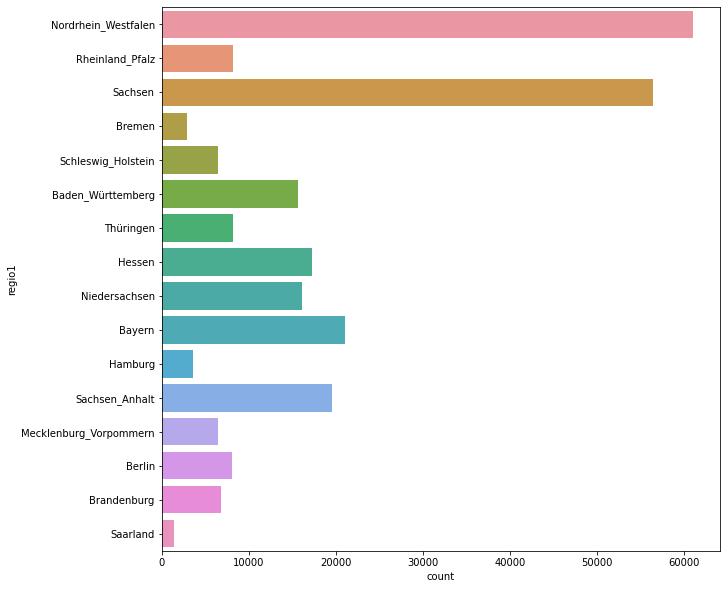

In [32]:
plt.figure(figsize = (10,10))
sns.countplot(data = df , y = "regio1" )
plt.show()

### Plot for count of records based on 'condition'

In [33]:
df['condition'].value_counts()

well_kept                             130383
refurbished                            26041
fully_renovated                        25445
mint_condition                         21252
first_time_use                         21026
modernized                             16538
first_time_use_after_refurbishment     14922
negotiable                              2159
need_of_renovation                      1309
ripe_for_demolition                        4
Name: condition, dtype: int64

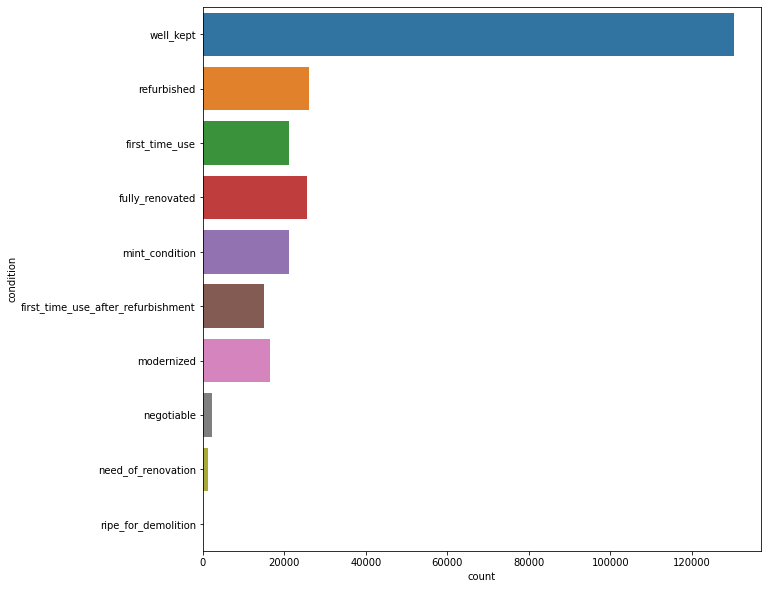

In [34]:
plt.figure(figsize = (10,10))
sns.countplot(data = df , y = "condition" )
plt.show()

### Plot for count of records based on 'Interior Quality'

In [35]:
df['interiorQual'].value_counts()

normal           187537
sophisticated     62379
luxury             7308
simple             1855
Name: interiorQual, dtype: int64

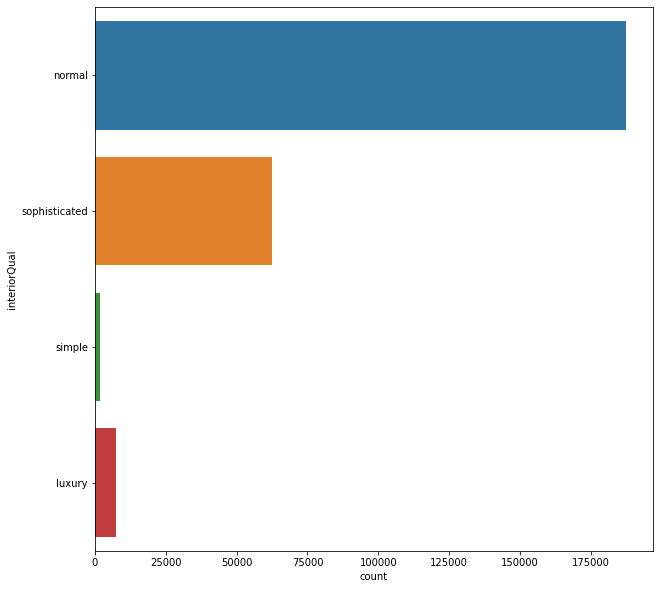

In [36]:
plt.figure(figsize = (10,10))
sns.countplot(data = df , y = "interiorQual" )
plt.show()

### Plot for count of records based on 'Heating Type'

In [37]:
df['heatingType'].value_counts()

central_heating                   167817
district_heating                   23775
gas_heating                        19308
self_contained_central_heating     17963
floor_heating                      17114
oil_heating                         4923
heat_pump                           2697
combined_heat_and_power_plant       1920
night_storage_heater                1290
wood_pellet_heating                  934
electric_heating                     870
stove_heating                        303
solar_heating                        165
Name: heatingType, dtype: int64

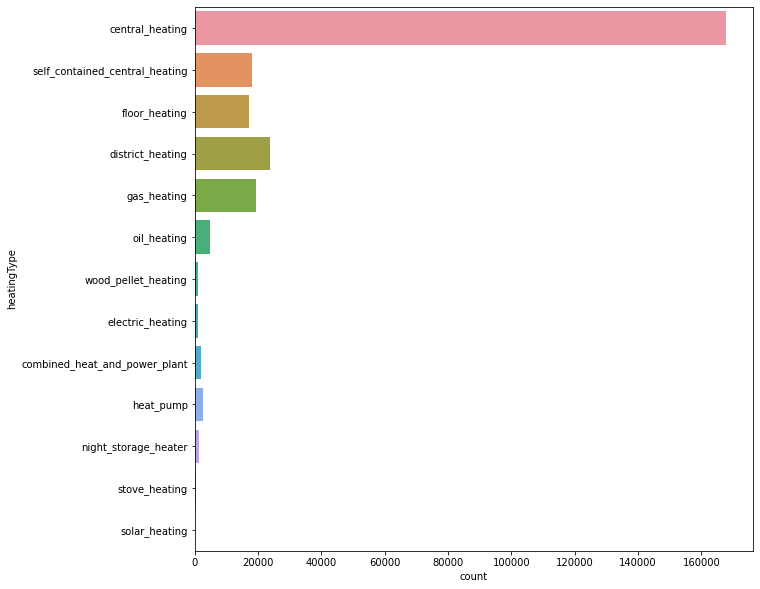

In [38]:
plt.figure(figsize = (10,10))
sns.countplot(data = df , y = "heatingType" )
plt.show()

### Plot for count of records based on 'type of flat'

In [39]:
df['typeOfFlat'].value_counts()

apartment              161456
roof_storey             33799
ground_floor            30462
other                    9205
maisonette               9008
raised_ground_floor      5476
penthouse                3462
terraced_flat            3315
half_basement            1982
loft                      914
Name: typeOfFlat, dtype: int64

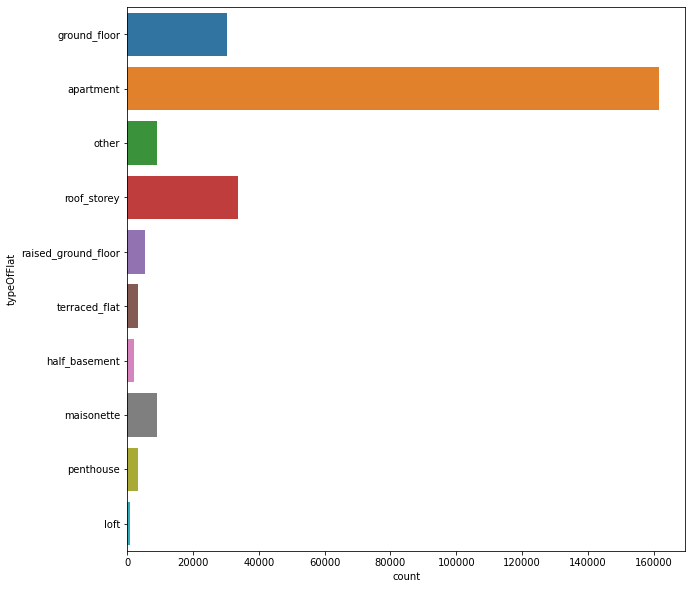

In [40]:
plt.figure(figsize = (10,10))
sns.countplot(data = df , y = "typeOfFlat" )
plt.show()

### Plot for distribution of boolean features

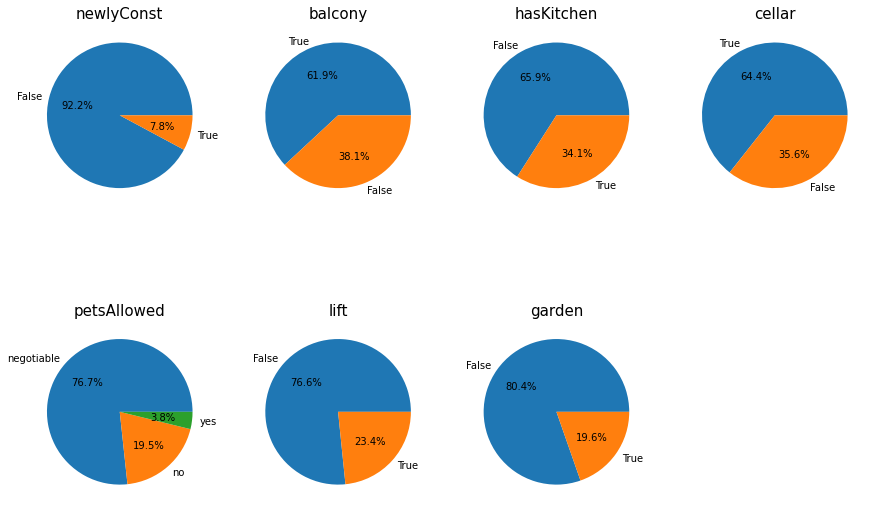

In [41]:
features = ['newlyConst', 'balcony', 'hasKitchen', 'cellar', 'petsAllowed' , 'lift', 'garden']

count = 0
plt.figure(figsize=(15,10))
for i in features:
    
    labels = df[i].value_counts().index
    sizes = df[i].value_counts().values  
    
    plt.subplot(2,4,count+1)
    plt.pie(sizes, labels = labels, autopct='%1.1f%%')
    plt.title(features[count], color = 'black',fontsize = 15)
    count += 1

plt.show()

### Correlation plot

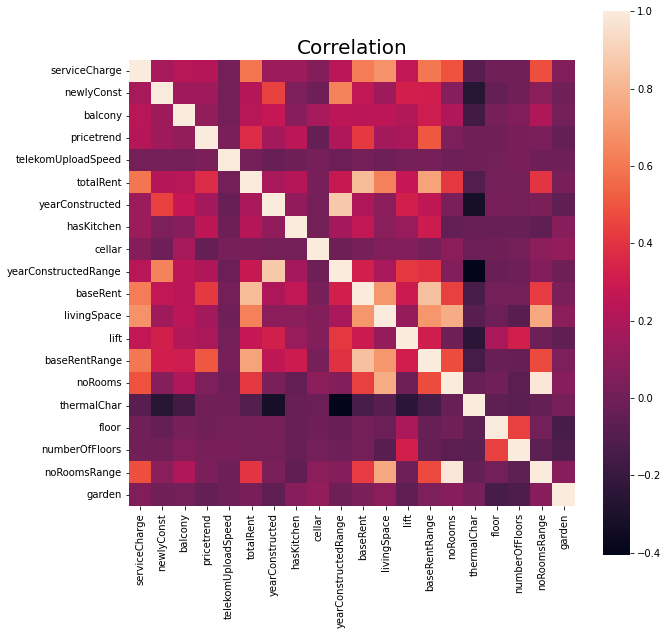

In [42]:
plt.figure(figsize = (10,10))
corr = df.corr()
sns.heatmap(corr, square = True)
plt.title('Correlation', fontsize = 20)
plt.show()

variables that irrelevant to 'totalRent' are 'cellar','floor' and 'garden' so I would consider drop it.

In [43]:
df.drop(['cellar','floor','garden'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


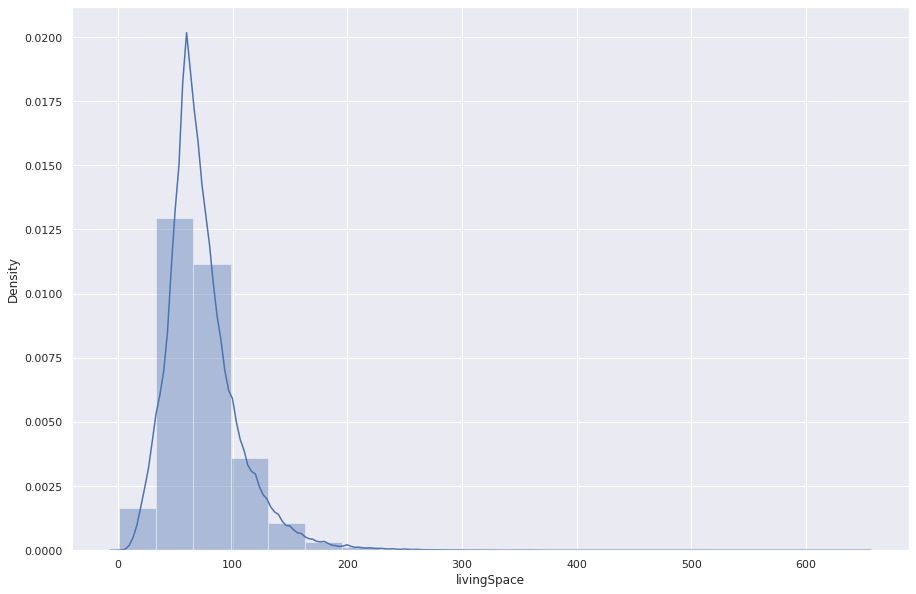

In [44]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(df['livingSpace'],kde_kws={"label": 'livingSpace'}, bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


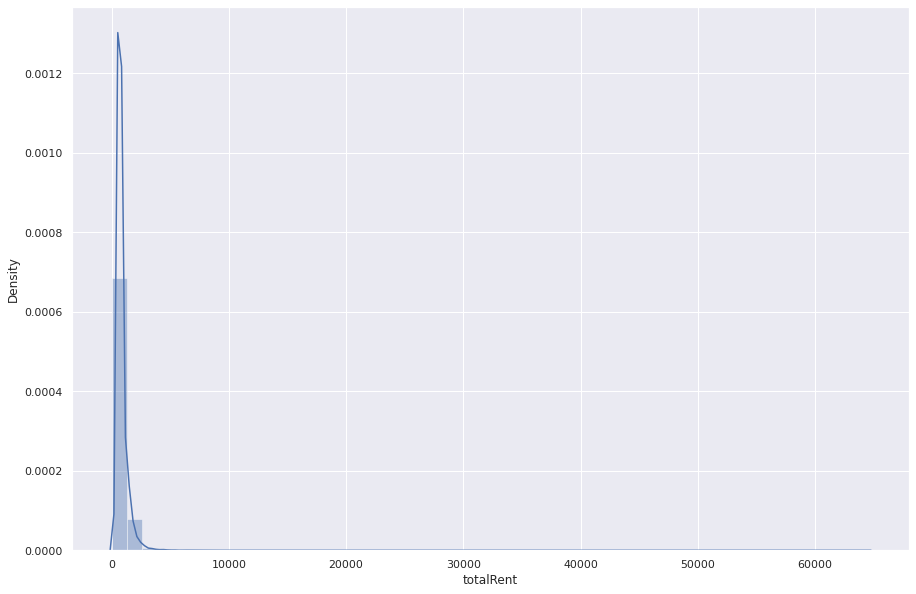

In [45]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(df['totalRent'],kde_kws={"label": 'totalRent'}, bins=50)

### Plot of relation between 'region' and 'base rent range'

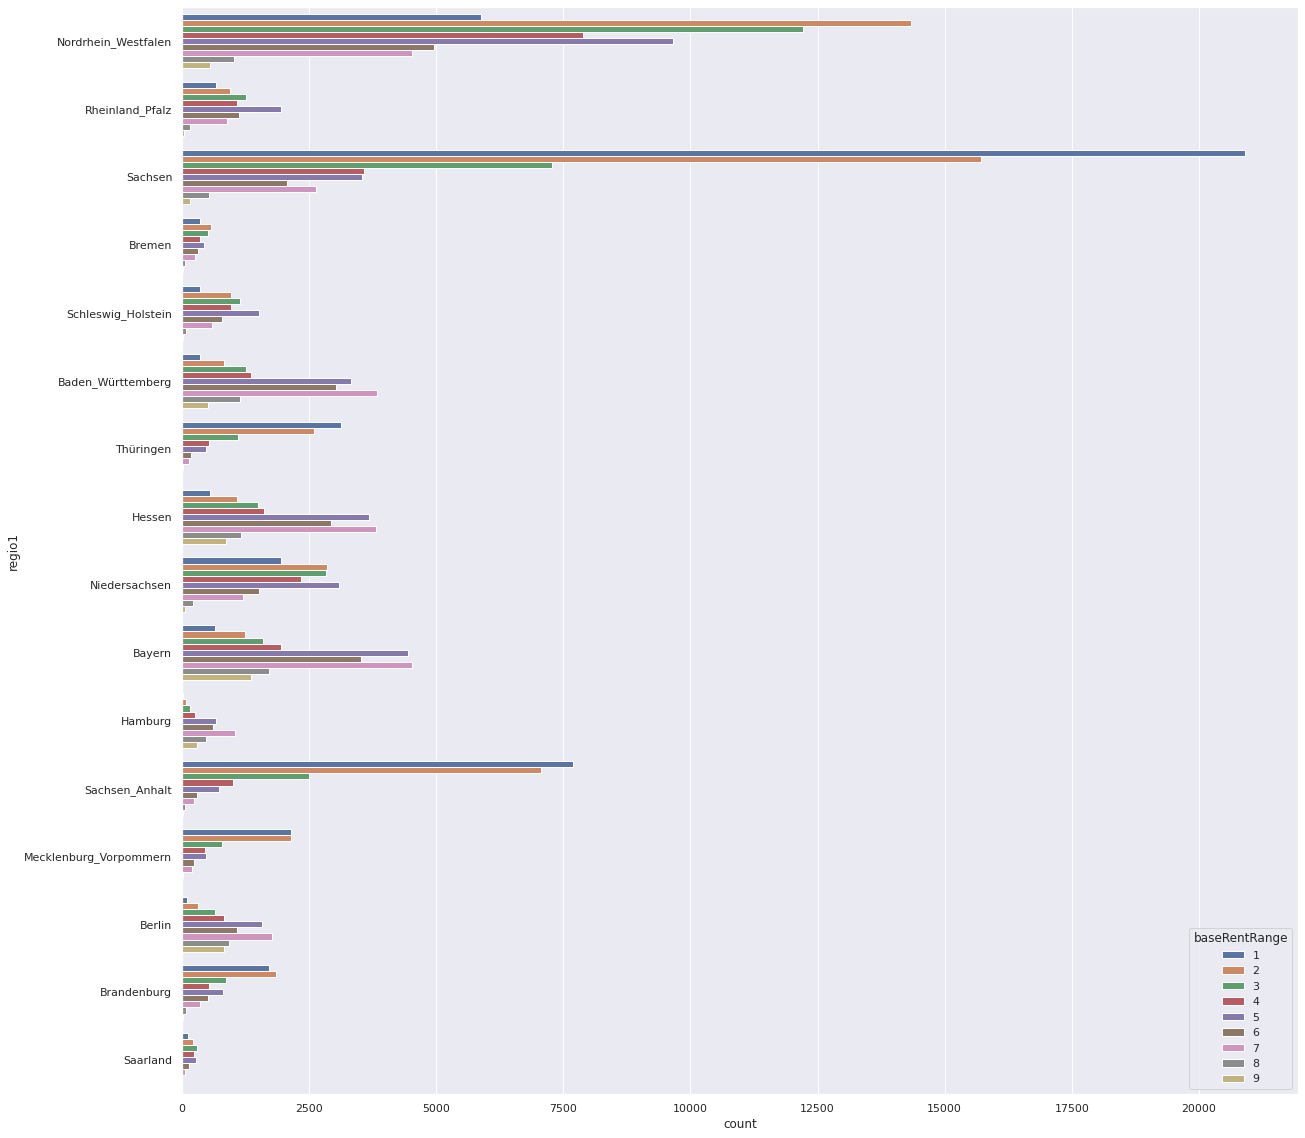

In [46]:
plt.figure(figsize = (20,20))
sns.countplot(y="regio1", hue="baseRentRange", data=df)


### Plot of relation between 'typeOfFlat' and 'base rent range'

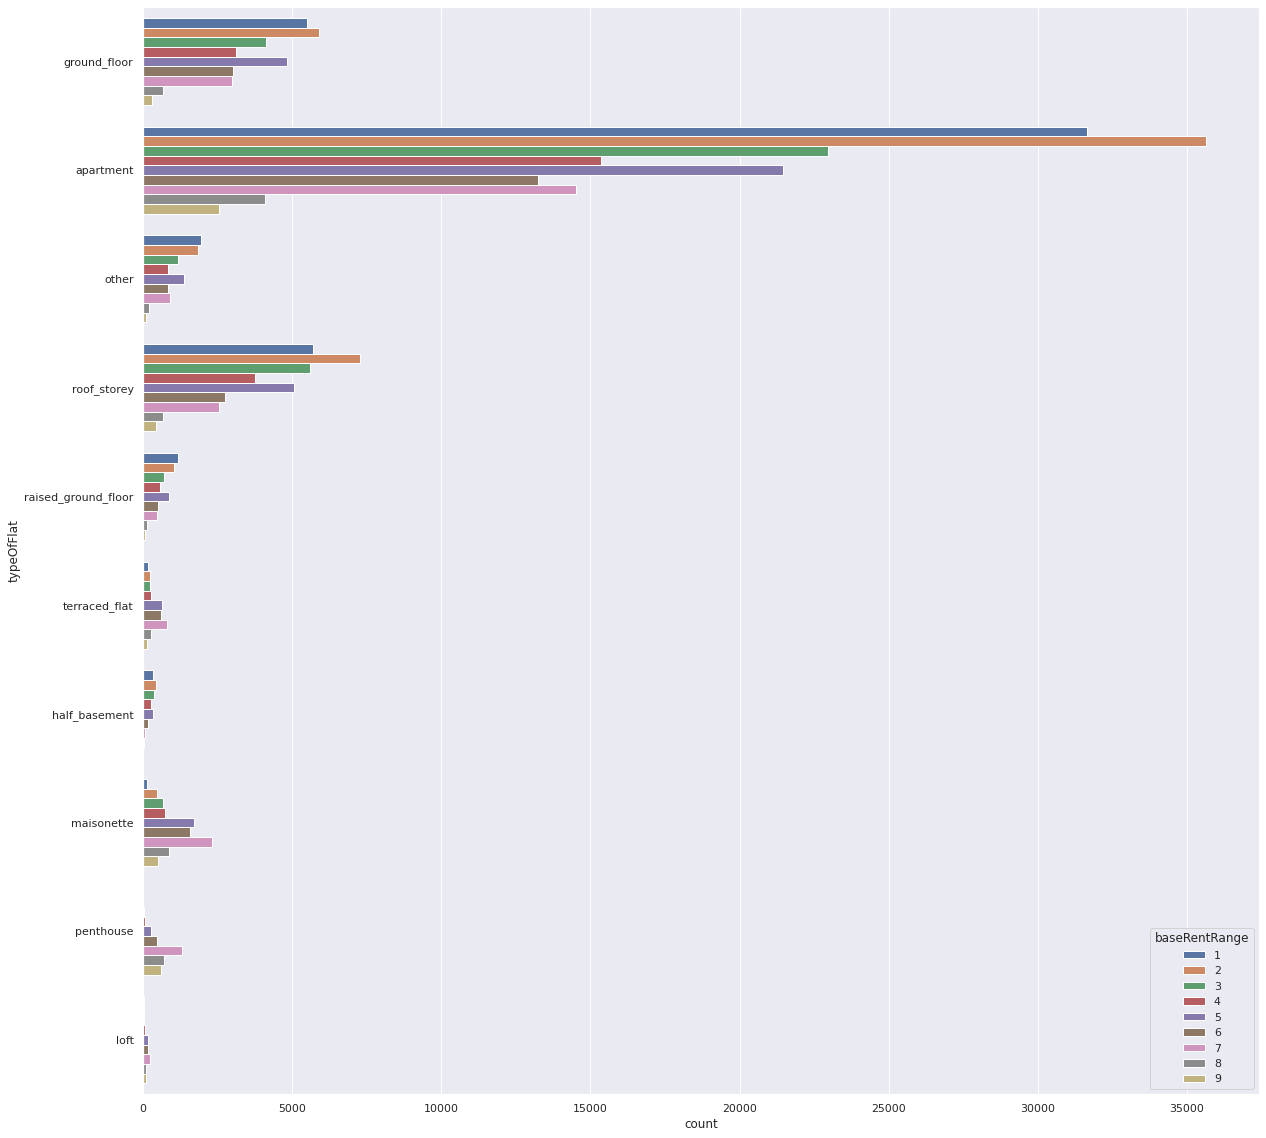

In [47]:
plt.figure(figsize = (20,20))
sns.countplot(y="typeOfFlat", hue="baseRentRange", data=df)


# Task 3

In [48]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'newlyConst', 'balcony',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'hasKitchen', 'yearConstructedRange', 'baseRent', 'livingSpace',
       'condition', 'interiorQual', 'petsAllowed', 'lift', 'baseRentRange',
       'typeOfFlat', 'noRooms', 'thermalChar', 'numberOfFloors',
       'noRoomsRange'],
      dtype='object')

## Convert categorical data to dummies variables

In [49]:
cat_columns = []
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'bool':
        cat_columns.append(col)
        
cat_columns

['regio1',
 'heatingType',
 'newlyConst',
 'balcony',
 'hasKitchen',
 'condition',
 'interiorQual',
 'petsAllowed',
 'lift',
 'typeOfFlat']

In [50]:
dummies_feature = pd.get_dummies(df[cat_columns])
dummies_feature.head()

,newlyConst,balcony,hasKitchen,lift,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,heatingType_solar_heating,heatingType_stove_heating,heatingType_wood_pellet_heating,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,False,False,False,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,False,True,False,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,True,True,False,True,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
3,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,False,True,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [51]:
df = pd.concat([df, dummies_feature], axis=1)
df.head()

,regio1,serviceCharge,heatingType,newlyConst,balcony,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,noRooms,thermalChar,numberOfFloors,noRoomsRange,newlyConst,balcony,hasKitchen,lift,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,heatingType_solar_heating,heatingType_stove_heating,heatingType_wood_pellet_heating,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,Nordrhein_Westfalen,245.00,central_heating,False,False,4.62,10.000000,840.000000,1965.0,False,2.0,595.0,86.00,well_kept,normal,negotiable,False,4,ground_floor,4.0,181.400000,3.000000,4,False,False,False,False,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,3.47,10.000000,901.331522,1871.0,False,1.0,800.0,89.00,refurbished,normal,no,False,5,ground_floor,3.0,114.749533,3.572319,3,False,True,False,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,Sachsen,255.00,floor_heating,True,True,2.72,2.400000,1300.000000,2019.0,False,9.0,965.0,83.80,first_time_use,sophisticated,negotiable,True,6,apartment,3.0,114.749533,4.000000,3,True,True,False,True,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
3,Sachsen,58.15,district_heating,False,True,1.53,40.000000,901.331522,1964.0,False,2.0,343.0,58.15,well_kept,normal,negotiable,False,2,other,3.0,86.000000,3.572319,3,False,True,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,Bremen,138.00,self_contained_central_heating,False,True,2.46,28.804928,903.000000,1950.0,False,1.0,765.0,84.97,refurbished,normal,negotiable,False,5,apartment,3.0,188.900000,3.572319,3,False,True,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [52]:
df = df.drop(columns = cat_columns)
df.head()

,serviceCharge,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,thermalChar,numberOfFloors,noRoomsRange,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,heatingType_solar_heating,heatingType_stove_heating,heatingType_wood_pellet_heating,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,245.00,4.62,10.000000,840.000000,1965.0,2.0,595.0,86.00,4,4.0,181.400000,3.000000,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,134.00,3.47,10.000000,901.331522,1871.0,1.0,800.0,89.00,5,3.0,114.749533,3.572319,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,255.00,2.72,2.400000,1300.000000,2019.0,9.0,965.0,83.80,6,3.0,114.749533,4.000000,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
3,58.15,1.53,40.000000,901.331522,1964.0,2.0,343.0,58.15,2,3.0,86.000000,3.572319,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,138.00,2.46,28.804928,903.000000,1950.0,1.0,765.0,84.97,5,3.0,188.900000,3.572319,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [53]:
df._get_numeric_data().columns

Index(['serviceCharge', 'pricetrend', 'telekomUploadSpeed', 'totalRent',
       'yearConstructed', 'yearConstructedRange', 'baseRent', 'livingSpace',
       'baseRentRange', 'noRooms', 'thermalChar', 'numberOfFloors',
       'noRoomsRange', 'regio1_Baden_Württemberg', 'regio1_Bayern',
       'regio1_Berlin', 'regio1_Brandenburg', 'regio1_Bremen',
       'regio1_Hamburg', 'regio1_Hessen', 'regio1_Mecklenburg_Vorpommern',
       'regio1_Niedersachsen', 'regio1_Nordrhein_Westfalen',
       'regio1_Rheinland_Pfalz', 'regio1_Saarland', 'regio1_Sachsen',
       'regio1_Sachsen_Anhalt', 'regio1_Schleswig_Holstein',
       'regio1_Thüringen', 'heatingType_central_heating',
       'heatingType_combined_heat_and_power_plant',
       'heatingType_district_heating', 'heatingType_electric_heating',
       'heatingType_floor_heating', 'heatingType_gas_heating',
       'heatingType_heat_pump', 'heatingType_night_storage_heater',
       'heatingType_oil_heating', 'heatingType_self_contained_central_he

## Train/Test split

In [54]:
X = df.drop(['totalRent'], axis=1)
y = df['totalRent']

X.shape

(259079, 68)

In [55]:
y.shape

(259079,)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

X_train.head()

,serviceCharge,pricetrend,telekomUploadSpeed,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,thermalChar,numberOfFloors,noRoomsRange,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,heatingType_solar_heating,heatingType_stove_heating,heatingType_wood_pellet_heating,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
167189,140.00,0.00,40.000000,1930.00000,1.000000,280.00,70.00,1,3.0,109.900000,4.000000,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
32873,300.00,2.02,40.000000,1966.40059,3.714544,1300.00,85.00,7,3.0,114.749533,3.572319,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
39905,130.00,0.59,40.000000,1966.40059,3.714544,490.00,125.00,3,4.0,114.749533,3.572319,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
180971,79.19,1.89,28.804928,1984.00000,4.000000,329.87,65.45,2,2.0,105.000000,5.000000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
5679,120.00,2.82,2.400000,1997.00000,5.000000,510.00,85.00,4,3.0,114.749533,3.572319,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


## MinMax scaling on numeric data

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_MinMax = scaler.fit_transform(X_train)
X_train_MinMax = pd.DataFrame(X_train_MinMax, columns = X_train.columns)
X_test_MinMax = scaler.transform(X_test)
X_test_MinMax = pd.DataFrame(X_test_MinMax, columns = X_test.columns)

In [58]:
X_train_MinMax.head()

,serviceCharge,pricetrend,telekomUploadSpeed,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,noRooms,thermalChar,numberOfFloors,noRoomsRange,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,heatingType_solar_heating,heatingType_stove_heating,heatingType_wood_pellet_heating,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,0.132388,0.208547,1.000000,0.354839,0.000000,0.007143,0.106481,0.000,0.222222,0.424536,0.222222,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.283688,0.381197,1.000000,0.501615,0.339318,0.033163,0.129630,0.750,0.222222,0.443303,0.198462,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.122931,0.258974,1.000000,0.501615,0.339318,0.012500,0.191358,0.250,0.333333,0.443303,0.198462,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.074884,0.370085,0.712947,0.572581,0.375000,0.008415,0.099460,0.125,0.111111,0.405573,0.277778,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.113475,0.449573,0.035897,0.625000,0.500000,0.013010,0.129630,0.375,0.222222,0.443303,0.198462,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Linear Regression Model

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

linear_model = LinearRegression()
linear_model.fit(X_train_MinMax, y_train)
y_predict = linear_model.predict(X_test_MinMax)

mean_squared_error(y_predict, y_test)

47937.18056698318

In [60]:
mean_absolute_error(y_predict, y_test)

113.28783266849436

In [61]:
linear_model.score(X_test_MinMax, y_test)

0.8106570599697364

In [62]:
res = pd.DataFrame({'test':y_test,'predict':y_predict})
res.head()

,test,predict
181615,520.0,561.25
175083,499.0,557.00
63612,474.0,545.25
77956,1120.0,1126.25
46755,422.0,516.25


# Task 4

## Fill null in numeric data by mean using multiprocessing

In [63]:
from multiprocessing import Pool, cpu_count

In [64]:
cpu_count()

2

In [73]:
groups = org_df.groupby('baseRentRange')
for label , group in groups:
    print(f'label : {label}')
    print(f'groupby : \n {group}')

label : 1
groupby : 
                      regio1  serviceCharge                     heatingType  \
9       Nordrhein_Westfalen          95.00  self_contained_central_heating   
10                  Sachsen          88.00                             NaN   
15                Thüringen          80.00                district_heating   
17                  Sachsen          50.00                 central_heating   
27           Sachsen_Anhalt         147.32                district_heating   
...                     ...            ...                             ...   
268820       Sachsen_Anhalt         130.00                 central_heating   
268825              Sachsen         104.00                 central_heating   
268833              Sachsen         100.00                             NaN   
268842              Sachsen         140.00                             NaN   
268843              Sachsen         120.00                 central_heating   

        newlyConst  balcony  pricetrend  

In [74]:
def fillNullNum(group):
  group.fillna(group._get_numeric_data().mean(), inplace = True)
  return group

start = time.time()
with Pool(cpu_count()) as p:
    res_list = list(p.imap(fillNullNum, [group for _, group in groups]))

print('run time : \n' , (time.time() - start))
res_list[0]

run time : 
 1.0862016677856445


,regio1,serviceCharge,heatingType,newlyConst,balcony,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,regio2,regio3
9,Nordrhein_Westfalen,95.00,self_contained_central_heating,False,False,1.92,40.0,363.683133,1953.000000,gas,False,True,2.000000,300.0,60.00,well_kept,normal,negotiable,False,1,apartment,2.5,207.700000,2.000000,5.000000,2,False,Gelsenkirchen,Bulmke_Hüllen
10,Sachsen,88.00,NaN,False,True,0.21,40.0,307.000000,1930.000000,gas,False,True,1.000000,219.0,40.20,NaN,normal,NaN,False,1,apartment,2.0,123.000000,3.000000,3.830292,2,False,Chemnitz,Sonnenberg
15,Thüringen,80.00,district_heating,False,True,1.67,2.4,300.000000,1990.000000,district_heating,False,True,4.000000,220.0,36.63,first_time_use_after_refurbishment,NaN,NaN,False,1,apartment,1.0,79.000000,4.000000,5.000000,1,False,Weimar,Schöndorf
17,Sachsen,50.00,central_heating,False,False,1.96,40.0,325.000000,1897.000000,gas,False,False,1.000000,200.0,50.00,refurbished,normal,NaN,False,1,roof_storey,2.0,257.500000,3.000000,3.830292,2,True,Mittelsachsen_Kreis,Döbeln
27,Sachsen_Anhalt,147.32,district_heating,False,True,1.08,40.0,447.620000,1977.000000,district_heating,False,True,3.000000,300.3,56.66,NaN,NaN,yes,True,1,apartment,3.0,85.030000,6.000000,3.830292,3,False,Magdeburg,Kannenstieg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268820,Sachsen_Anhalt,130.00,central_heating,False,False,3.23,40.0,415.000000,1926.000000,gas,False,True,1.000000,285.0,55.00,mint_condition,NaN,negotiable,False,1,ground_floor,3.0,100.000000,1.000000,4.000000,3,False,Halle_Saale,Südliche_Innenstadt
268825,Sachsen,104.00,central_heating,False,True,0.36,40.0,326.000000,1955.900784,NaN,False,True,2.598675,222.0,47.34,fully_renovated,normal,negotiable,False,1,terraced_flat,1.0,117.363694,0.000000,4.000000,1,True,Chemnitz,Kaßberg
268833,Sachsen,100.00,NaN,False,False,2.10,40.0,363.683133,1873.000000,NaN,False,False,1.000000,300.0,102.00,refurbished,NaN,NaN,False,1,apartment,4.0,117.363694,2.234064,3.000000,4,False,Görlitz_Kreis,Löbau
268842,Sachsen,140.00,NaN,False,False,0.54,40.0,440.000000,1955.900784,NaN,True,False,2.598675,300.0,59.89,NaN,NaN,NaN,False,1,maisonette,2.0,117.363694,3.000000,0.000000,2,False,Zwickau,Nordvorstadt


In [67]:
org_df = pd.concat(res_list)
org_df.isna().sum()

regio1                       0
serviceCharge                0
heatingType              44856
newlyConst                   0
balcony                      0
pricetrend                   0
telekomUploadSpeed           0
totalRent                    0
yearConstructed              0
firingTypes              56964
hasKitchen                   0
cellar                       0
yearConstructedRange         0
baseRent                     0
livingSpace                  0
condition                68489
interiorQual            112665
petsAllowed             114573
lift                         0
baseRentRange                0
typeOfFlat               36614
noRooms                      0
thermalChar                  0
floor                        0
numberOfFloors               0
noRoomsRange                 0
garden                       0
regio2                       0
regio3                       0
dtype: int64

# Task 5

In [68]:
!python -m pip install "dask[complete]"

     |████████████████████████████████| 837 kB 8.8 MB/s 
     |████████████████████████████████| 136 kB 71.4 MB/s 
     |████████████████████████████████| 830 kB 53.8 MB/s 
     |████████████████████████████████| 822 kB 50.3 MB/s 
     |████████████████████████████████| 802 kB 62.4 MB/s 
     |████████████████████████████████| 802 kB 65.9 MB/s 
     |████████████████████████████████| 793 kB 45.9 MB/s 
     |████████████████████████████████| 793 kB 52.5 MB/s 
     |████████████████████████████████| 791 kB 46.2 MB/s 
     |████████████████████████████████| 786 kB 60.4 MB/s 
     |████████████████████████████████| 779 kB 57.8 MB/s 
     |████████████████████████████████| 778 kB 51.3 MB/s 
     |████████████████████████████████| 776 kB 48.4 MB/s 
     |████████████████████████████████| 769 kB 69.8 MB/s 
     |████████████████████████████████| 766 kB 77.2 MB/s 
     |████████████████████████████████| 1.0 MB 69.2 MB/s 
     |████████████████████████████████| 722 kB 79.6 MB/s 
     |█████████

In [69]:
import dask
import dask.dataframe as dd

org_df_2.shape

(268850, 29)

## Fill null in numeric data by mean using Dask

In [70]:
ddf = dd.from_pandas(org_df_2, npartitions=5)

In [71]:
ddf.partitions[0]

,regio1,serviceCharge,heatingType,newlyConst,balcony,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,regio2,regio3
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,object,float64,object,bool,bool,float64,float64,float64,float64,object,bool,bool,float64,float64,float64,object,object,object,bool,int64,object,float64,float64,float64,float64,int64,bool,object,object
53770,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [72]:
s_time = time.time()
ddf.fillna(ddf._get_numeric_data().mean())
print(f'run time : {time.time() - s_time}')

run time : 0.031278371810913086
